In [42]:
import pandas as pd
import seaborn as sns
#import matplotlib as plt
import matplotlib.pyplot as plt
import graphviz

data = pd.read_csv('DataSetForPhishingVSBenignUrl.csv')

In [43]:
df = data.copy()

df.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,...,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.0,Defacement
1,0,4,5,5.5,14,6.000000,4,12,4,0,...,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.0,-1.0,Defacement
2,0,4,5,5.5,14,5.800000,4,12,5,0,...,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.0,-1.0,Defacement
3,0,4,12,5.5,14,5.500000,4,32,16,0,...,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.0,-1.0,Defacement
4,0,4,6,5.5,14,7.333334,4,18,11,0,...,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.0,-1.0,Defacement


Text(0, 0.5, 'Count')

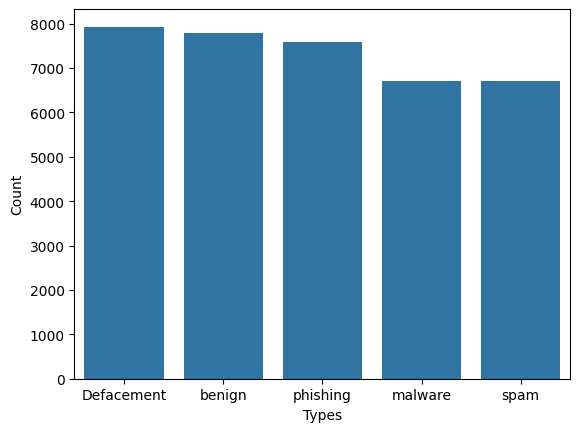

In [44]:
y = df['URL_Type_obf_Type']

y_count = y.index

count = df['URL_Type_obf_Type'].value_counts()

sns.barplot(x = count.index, y = count)
plt.xlabel('Types')
plt.ylabel('Count')

In [45]:
X = df.iloc[: , :79]
y = df['URL_Type_obf_Type']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size = 0.2, random_state = 100)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

# Decision Tree classifier with criteria - Gini Index
tree_gini = DecisionTreeClassifier(criterion = "gini", random_state = 50,
                               max_depth=1)
tree_gini.fit(X_train, y_train)

ValueError: Input X contains infinity or a value too large for dtype('float32').

In [ ]:
# Visualizing the Gini Index based Decision Tree
graph_data = tree.export_graphviz(tree_gini, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)
graph = graphviz.Source(graph_data)  
graph

In [ ]:
# Visualizing the Entropy based Decision Tree
graph_data = tree.export_graphviz(tree_entropy, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)
graph = graphviz.Source(graph_data)  
graph